<a href="https://colab.research.google.com/github/Joshika-Mentor/-Kid-s-Screentime-Visualization-Infosys-springboard-program-/blob/Nagulapalli-S-V-A-Sahithi-Iswarya/kids_screentym_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np

# Load and Read the Data

In [56]:
from google.colab import drive
import pandas as pd

# ✅ Mount Google Drive
drive.mount('/content/drive')

# ✅ Path to your CSV file inside Drive
file_path = '/content/drive/MyDrive/Indian_Kids_Screen_Time.csv'

# ✅ Read CSV
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# First and Last 5 Rows

In [57]:
print("First 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())
print("\nRandom 5 rows:\n", df.sample(5))


First 5 rows:
    Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4     

### Displaying Dataset Structure and Basic Information

In [58]:
print("\nShape (rows, cols):", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nFull Info:")
print(df.info())


Shape (rows, cols): (9712, 8)

Column Names:
 Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

Data Types:
 Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

Full Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 

# Numeric and Categorical Summary of the Dataset

In [59]:
# Numeric + categorical summary
print("\nSummary Stats:\n", df.describe(include="all"))


Summary Stats:
                 Age Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
count   9712.000000   9712               9712.000000           9712   
unique          NaN      2                       NaN              4   
top             NaN   Male                       NaN     Smartphone   
freq            NaN   4942                       NaN           4568   
mean      12.979201    NaN                  4.352837            NaN   
std        3.162437    NaN                  1.718232            NaN   
min        8.000000    NaN                  0.000000            NaN   
25%       10.000000    NaN                  3.410000            NaN   
50%       13.000000    NaN                  4.440000            NaN   
75%       16.000000    NaN                  5.380000            NaN   
max       18.000000    NaN                 13.890000            NaN   

       Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
count                        9712                        9

## 🧩 Displaying All Column Names in the Dataset


In [60]:
print(df.columns)


Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')


## 📊 Measures of Central Tendency (Mean, Median, Mode)

In [61]:
print("\nMean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode().iloc[0])  # first mode row


Mean:
 Age                                  12.979201
Avg_Daily_Screen_Time_hr              4.352837
Exceeded_Recommended_Limit            0.854716
Educational_to_Recreational_Ratio     0.427226
dtype: float64

Median:
 Age                                  13.00
Avg_Daily_Screen_Time_hr              4.44
Exceeded_Recommended_Limit            1.00
Educational_to_Recreational_Ratio     0.43
dtype: float64

Mode:
 Age                                          17
Gender                                     Male
Avg_Daily_Screen_Time_hr                    0.0
Primary_Device                       Smartphone
Exceeded_Recommended_Limit                 True
Educational_to_Recreational_Ratio          0.45
Health_Impacts                       Poor Sleep
Urban_or_Rural                            Urban
Name: 0, dtype: object


# Checking for Missing (Null) Values in the Dataset

In [62]:
# Check null values in each column
print("Null values in each column:")
print(df.isnull().sum())

# Check if any null exists in the dataset
print("\nAny null values in dataset?")
print(df.isnull().any().any())

Null values in each column:
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

Any null values in dataset?
True


# Displaying Rows That Contain Missing Values

In [63]:
# Rows containing at least one null
print("Rows with missing values:")
print(df[df.isnull().any(axis=1)])

Rows with missing values:
      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
3      15  Female                      1.21         Laptop   
6      17    Male                      2.97             TV   
7      10    Male                      2.74             TV   
19      9  Female                      0.00             TV   
22      9  Female                      1.63         Tablet   
...   ...     ...                       ...            ...   
9695   12  Female                      2.69     Smartphone   
9697   16  Female                      4.74     Smartphone   
9699   10  Female                      2.85             TV   
9701   16    Male                      6.08     Smartphone   
9706    8    Male                      4.84     Smartphone   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
3                          False                               0.39   
6                          False                               0.48   
7               

# Extracting the 'Primary_Device' Column from the Dataset

In [64]:
df1 = df["Primary_Device"]
print(df1)


0       Smartphone
1           Laptop
2               TV
3           Laptop
4       Smartphone
           ...    
9707    Smartphone
9708    Smartphone
9709    Smartphone
9710            TV
9711            TV
Name: Primary_Device, Length: 9712, dtype: object


# Selecting Specific Rows and Columns Using iloc and loc

In [65]:
# iloc - by position
print(df.iloc[2])        # Third row
print(df.iloc[1:4, 0:2]) # Rows 1-3, first 2 columns

# loc - by labels (use exact column names!)
df.columns = df.columns.str.replace(" ", "_")  # Standardize
print(df.loc[:3, ["Age", "Avg_Daily_Screen_Time_hr"]])

# Column slicing
print(df["Age"][:3])

Age                                          18
Gender                                   Female
Avg_Daily_Screen_Time_hr                   3.73
Primary_Device                               TV
Exceeded_Recommended_Limit                 True
Educational_to_Recreational_Ratio          0.32
Health_Impacts                       Poor Sleep
Urban_or_Rural                            Urban
Name: 2, dtype: object
   Age  Gender
1   11  Female
2   18  Female
3   15  Female
   Age  Avg_Daily_Screen_Time_hr
0   14                      3.99
1   11                      4.61
2   18                      3.73
3   15                      1.21
0    14
1    11
2    18
Name: Age, dtype: int64


# Slicing Single and Multiple Columns

In [66]:
# Single column slice
print(df["Age"][:3])

# Multiple columns slice using loc
print(df.loc[:3, ["Age", "Gender"]])

0    14
1    11
2    18
Name: Age, dtype: int64
   Age  Gender
0   14    Male
1   11  Female
2   18  Female
3   15  Female


# Filtering Kids with More Than 5 Hours of Screen Time

In [67]:
# Kids with more than 5 hours screen time
high_screen_time = df[df["Avg_Daily_Screen_Time_hr"] > 5]
print(high_screen_time)

      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
4      12  Female                      5.89     Smartphone   
13     11    Male                      6.08             TV   
14     15    Male                      6.15     Smartphone   
16     10  Female                      7.10     Smartphone   
17     13  Female                      6.98     Smartphone   
...   ...     ...                       ...            ...   
9703    9    Male                      6.62     Smartphone   
9705    9  Female                      8.07             TV   
9709   16    Male                      5.62     Smartphone   
9710   17    Male                      5.60             TV   
9711   15  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
4                           True                               0.49   
13                          True                               0.48   
14                          True          

# Converting Columns to Categorical Data Type

In [68]:
df['Gender'] = df['Gender'].astype('category')
df['Urban_or_Rural'] = df['Urban_or_Rural'].astype('category')
print(df.dtypes)

Age                                     int64
Gender                               category
Avg_Daily_Screen_Time_hr              float64
Primary_Device                         object
Exceeded_Recommended_Limit               bool
Educational_to_Recreational_Ratio     float64
Health_Impacts                         object
Urban_or_Rural                       category
dtype: object


# Displaying Categories of Categorical Columns

In [69]:
print(df['Gender'].cat.categories)
print(df['Urban_or_Rural'].cat.categories)

Index(['Female', 'Male'], dtype='object')
Index(['Rural', 'Urban'], dtype='object')


# Distribution of Average Daily Screen Time(Histogram)


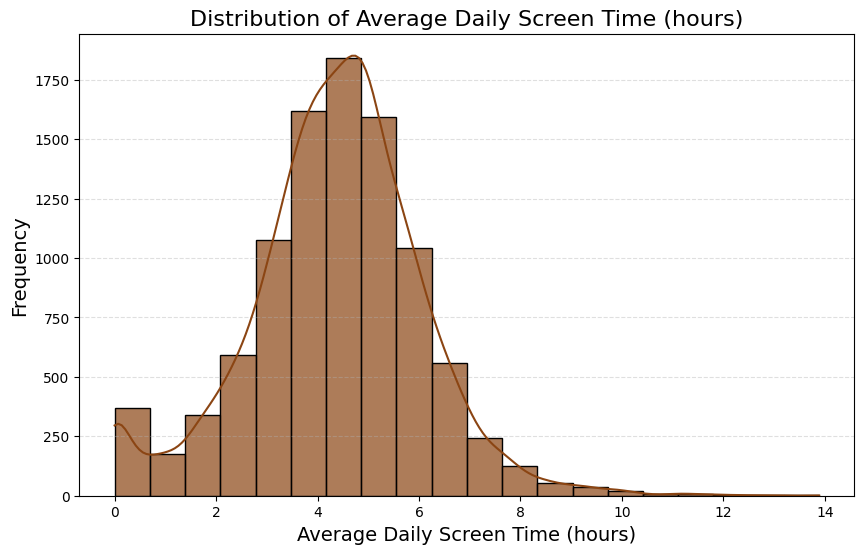

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
sns.histplot(
    df['Avg_Daily_Screen_Time_hr'],  # ✅ correct column name
    bins=20,
    kde=True,                       # adds a smooth density curve
    color="#8B4513",                # brown color
    alpha=0.7                        # transparency for bars
)
plt.title("Distribution of Average Daily Screen Time (hours)", fontsize=16)
plt.xlabel("Average Daily Screen Time (hours)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()




Most people spend around 4–5 hours on screens daily. Very few use screens for more than 8 hours, and the data is skewed to the right, meaning long screen times are less common.

# Count of Kids by Gender(Countplot)

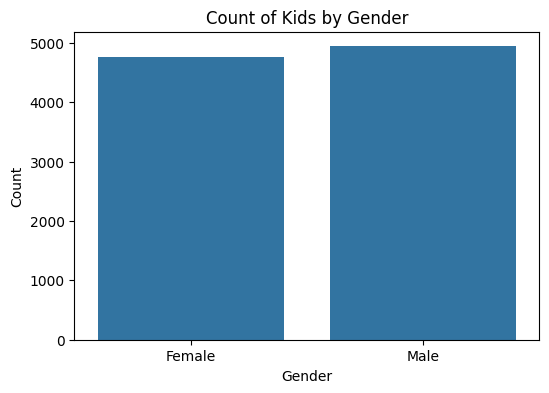

In [71]:
#Countplot for gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Count of Kids by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The chart shows that the number of male and female kids is almost equal, with males slightly higher than females.

## Gender Count Distribution

/tmp/ipython-input-4285923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


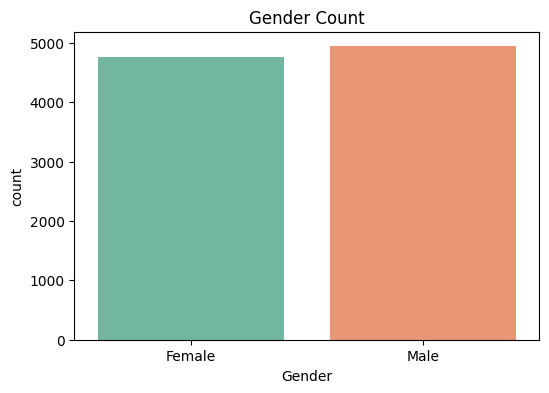

In [72]:
# ✅ Gender Countplot
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Count")
plt.show()




The chart shows that the number of male and female kids is nearly equal, with males slightly higher.
This means the dataset has a balanced gender representation overall.

/tmp/ipython-input-3065665508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Urban_or_Rural', data=df, palette='Set3')


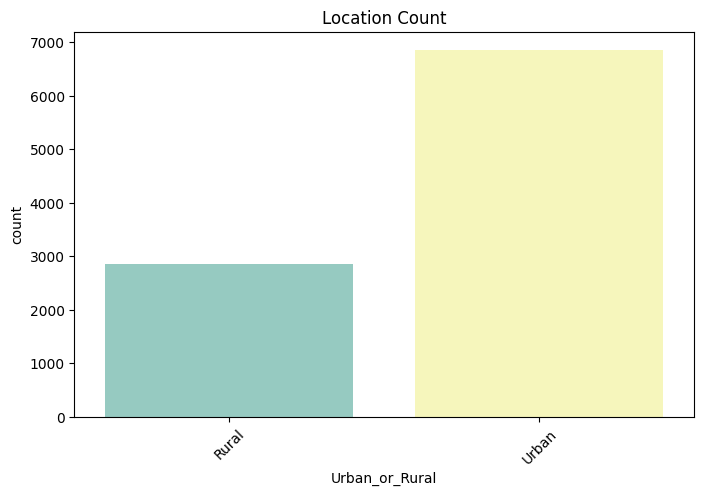

In [73]:
# ✅ Location Countplot
plt.figure(figsize=(8,5))
sns.countplot(x='Urban_or_Rural', data=df, palette='Set3')
plt.title("Location Count")
plt.xticks(rotation=45)  # rotate labels if they are long
plt.show()

This bar chart shows that the Urban population count is much higher than the Rural population count.
In simple terms — there are more people from urban areas than from rural areas in the dataset.

## countplot for device type

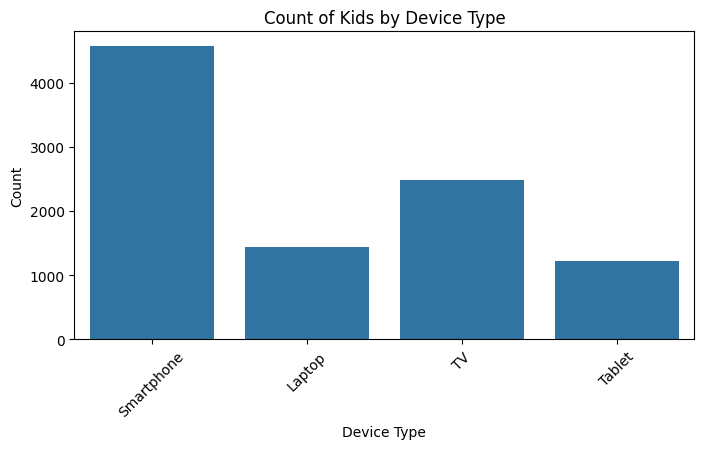

In [74]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Primary_Device')
plt.title('Count of Kids by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()

This bar chart shows that most kids use smartphones, followed by TVs, while laptops and tablets are used much less.

Explore the relationship between 'Health_Impacts' and 'Primary_Device' using a count plot and then explore the relationship between 'Health_Impacts' and 'Age' by grouping age into ranges and using a count plot.

## violin plot for average screen time with respect to Gender

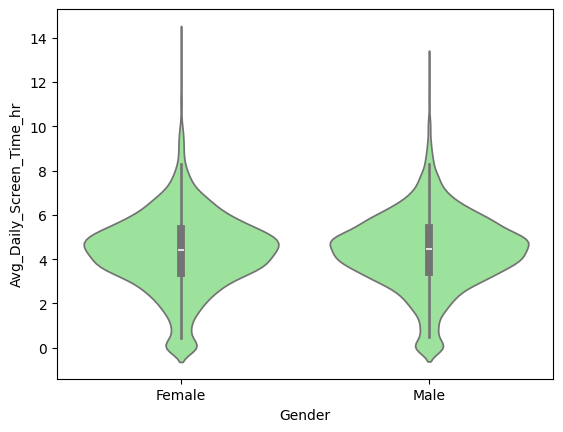

In [75]:
#violin plot for average screen time with respect to Gender
sns.violinplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, color='lightgreen')
plt.show()


This violin plot shows that both males and females have similar average daily screen times, mostly around 4 to 5 hours per day.

## violin plot for average screen time with respect to Age

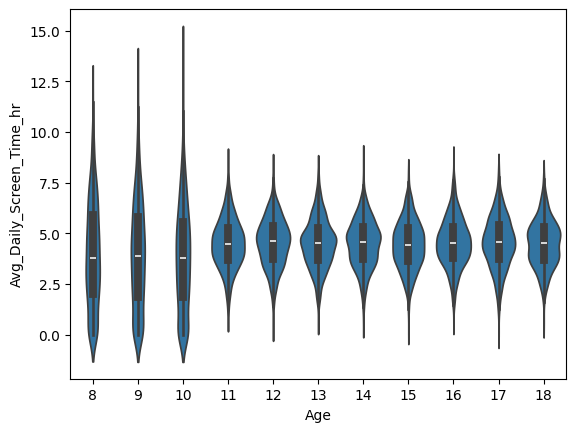

In [76]:
#violin plot for average screen time with respect to Age
sns.violinplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df)
plt.show()


Kids aged 8, 9, and 10 have the highest variability in screen time, meaning some use very little time, and others use a lot—up to 13 to 15 hours.

For ages 11 through 18, the screen time is more consistent and lower, with the average use generally centered around 4 to 5 hours per day.

## box plot for average screen time with respect to Age

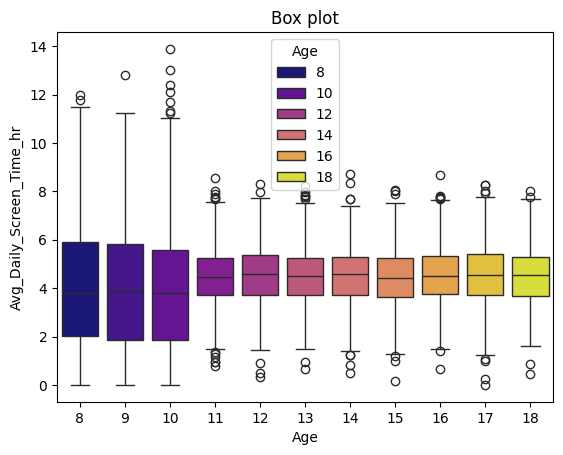

<Figure size 800x500 with 0 Axes>

In [77]:
#box plot for average screen time with respect to Age
sns.boxplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df,
hue='Age',palette='plasma', legend=True, )
plt.title('Box plot')
plt.figure(figsize=(8,5))
plt.show()


Screen time habits are all over the place for the youngest kids (ages 8, 9, and 10), with some using an extreme amount (up to 15 hours).
However, for teenagers (ages 11 through 18), screen time becomes very stable and consistent, generally settling around 4 to 5 hours per day.

## box plot for average screen time with respect to Gender

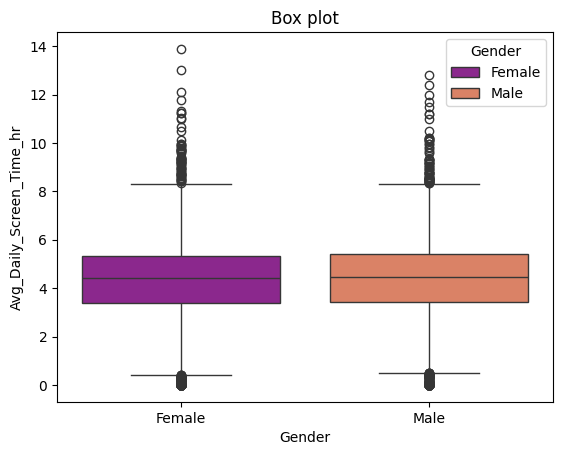

<Figure size 800x500 with 0 Axes>

In [78]:
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr',
data=df, hue='Gender',palette='plasma', legend=True, )
plt.title('Box plot')
plt.figure(figsize=(8,5))
plt.show()



On average, there is virtually no difference in daily screen time between females and males.
Both genders have:
An average (median) screen time of about 4.5 to 5 hours.
A similar range of usage.
Similar extreme cases, with a few individuals in both groups reporting very high screen times (up to 13–14 hours).

# histogram for continuos variables

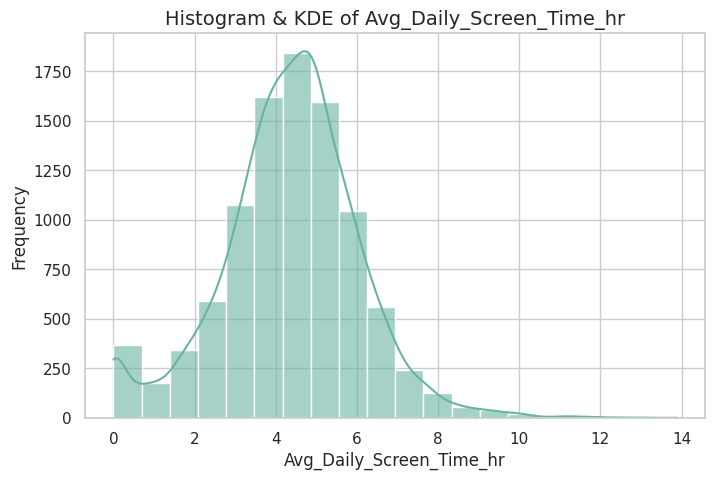

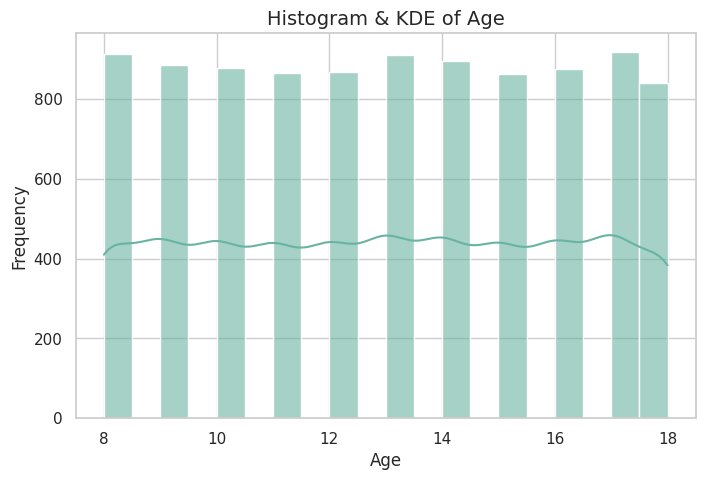

In [79]:
sns.set(style="whitegrid")
continuous_vars = ["Avg_Daily_Screen_Time_hr", "Age"]

for col in continuous_vars:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=20, color="#69b3a2", alpha=0.6)
    plt.title(f"Histogram & KDE of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


1.First Graph:Most people in the study use screens for about 4 to 5 hours a day. A few use much more, leading to a slight spread towards higher screen times.

2.Second Graph:The study has a very even mix of participants. It includes roughly the same number of people for every single age from 8 to 18.

## Screen Time Distribution by Gender (KDE Plot)

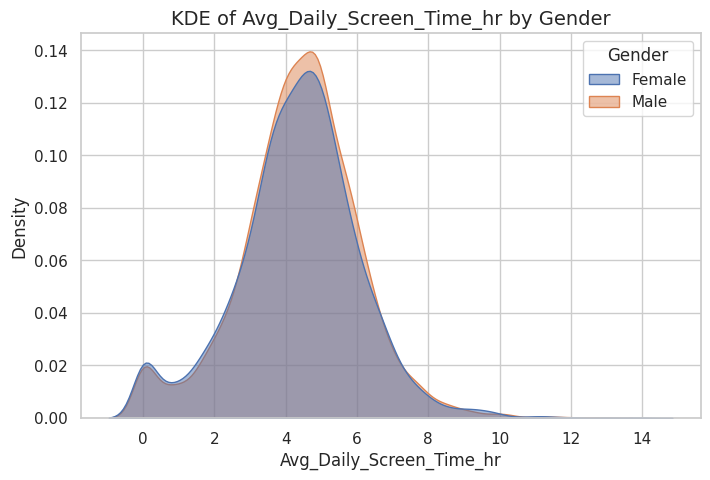

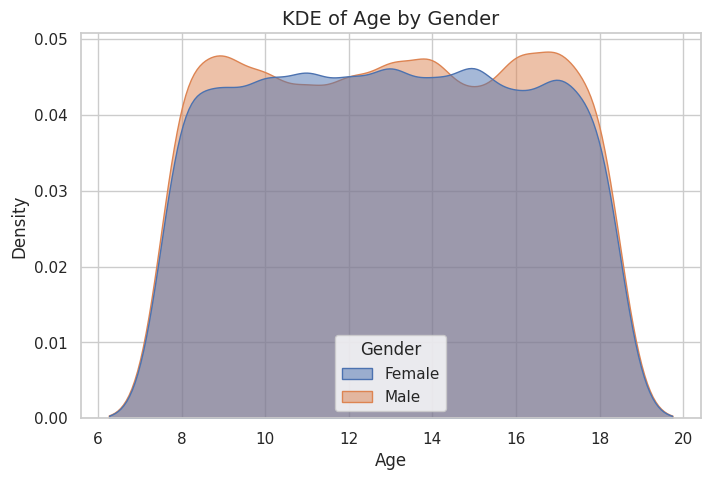

In [80]:
#KDE plots
for col in continuous_vars:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=df, x=col, hue="Gender", fill=True, alpha=0.5)
    plt.title(f"KDE of {col} by Gender", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


1.First Graph:The two curves (blue for Female and orange for Male) almost completely overlap, indicating very little difference.
Similarity: Both females and males have the same most common screen time, peaking around 4.5 to 5 hours.
Low Usage: Both have a small bump around 0 hours, showing a similar number of very low screen users.
High Usage: The curves fade out similarly for high screen times.

2.Second Graph:The plot confirms that the study has a very even and balanced mix of participants across all ages. The number of females and males in each age group (from about 7 to 19) is virtually the same.

## Scatterplot: Age vs Average Daily Screen Time

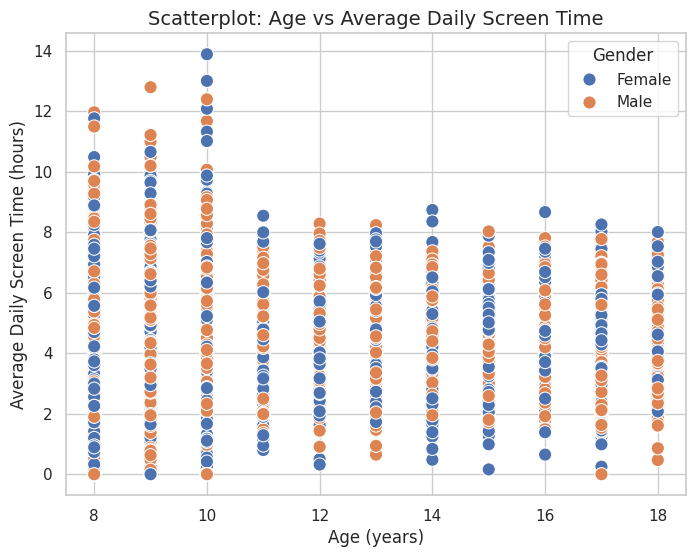

In [81]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr', hue='Gender', s=90)
plt.title("Scatterplot: Age vs Average Daily Screen Time", fontsize=14)
plt.xlabel("Age (years)")
plt.ylabel("Average Daily Screen Time (hours)")
plt.grid(True)
plt.show()


Young kids (ages 8-10) have the wildest screen time habits, with some using up to 14 hours. After age 10, screen time becomes much more predictable, mostly staying between 3 and 8 hours. Gender makes no difference to screen time usage at any age.

## Bar plot location Vs screen time differ by Gender

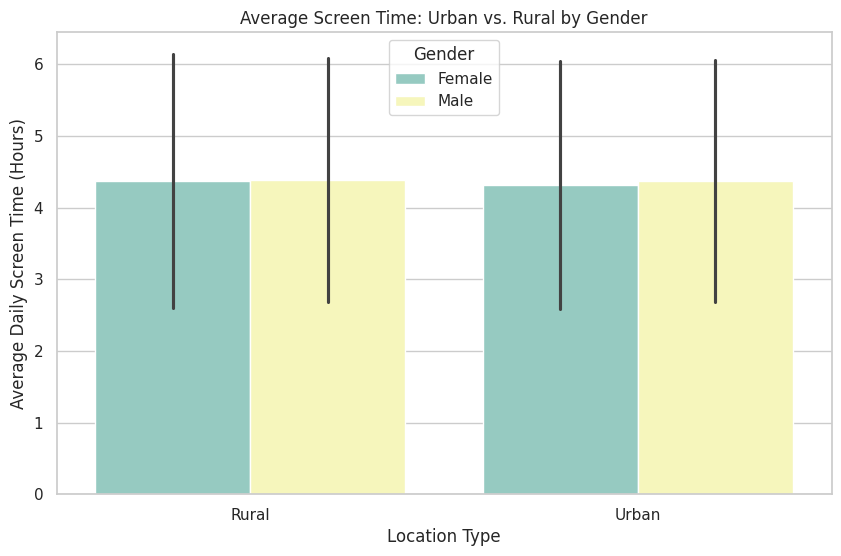

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Urban_or_Rural',
    y='Avg_Daily_Screen_Time_hr',
    hue='Gender',
    palette='Set3',
    errorbar='sd'
)
plt.title('Average Screen Time: Urban vs. Rural by Gender')
plt.xlabel('Location Type')
plt.ylabel('Average Daily Screen Time (Hours)')
plt.legend(title='Gender')
plt.show()



The graph clearly shows that the average daily screen time is the same for everyone—it doesn't matter if the person is a female or male, or if they live in a rural or urban area. The average is about 4.3 hours across all categories.

## Bar plot Primary device Vs screen time differ by Gender

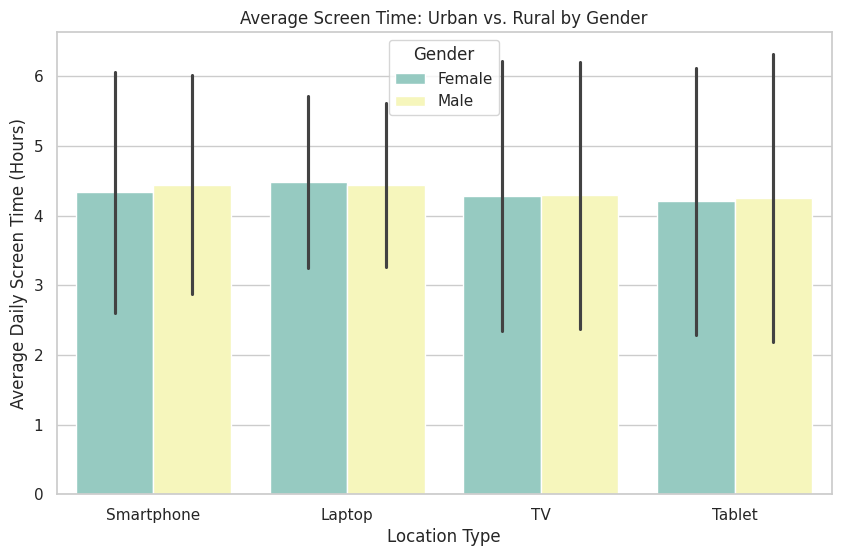

In [83]:

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Primary_Device',
    y='Avg_Daily_Screen_Time_hr',
    hue='Gender',
    palette='Set3',
    errorbar='sd'
)
plt.title('Average Screen Time: Urban vs. Rural by Gender')
plt.xlabel('Location Type')
plt.ylabel('Average Daily Screen Time (Hours)')
plt.legend(title='Gender')
plt.show()

The average time spent on Smartphones, Laptops, TVs, and Tablets is nearly identical (about 4.2-4.5 hours), and there is no difference between females and males for any device.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


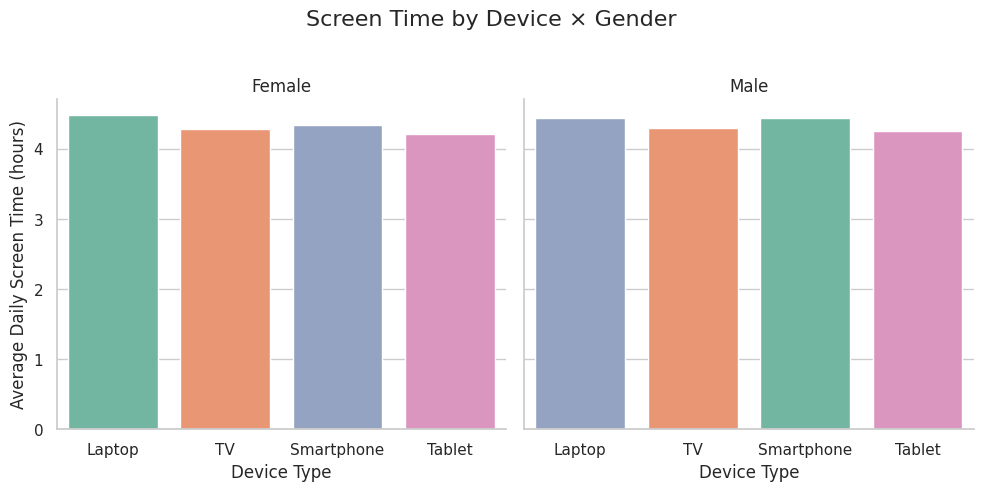

In [84]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
df = df.dropna(subset=['Gender', 'Primary_Device', 'Avg_Daily_Screen_Time_hr'])
df['Avg_Daily_Screen_Time_hr'] = pd.to_numeric(df['Avg_Daily_Screen_Time_hr'], errors='coerce')
g = sns.FacetGrid(df, col="Gender", height=5, aspect=1)
g.map_dataframe(sns.barplot, x="Primary_Device", y="Avg_Daily_Screen_Time_hr", palette="Set2", ci=None)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Device Type", "Average Daily Screen Time (hours)")
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Screen Time by Device × Gender", fontsize=16)
plt.show()





Young Kids (Ages 8-10) are Unpredictable: They have the widest range of screen time, with some using extreme amounts (up to 15 hours).

Teenagers (Ages 11-18) are Consistent: Their screen time settles down to a very stable average of 4 to 5 hours per day.

Gender, Location, and Device Don't Matter: The average screen time is the same for everyone regardless of whether they are male or female, live in a city or rural area, or what device they are using.

## Pairplot of numerical variables by gender and with respect to columns

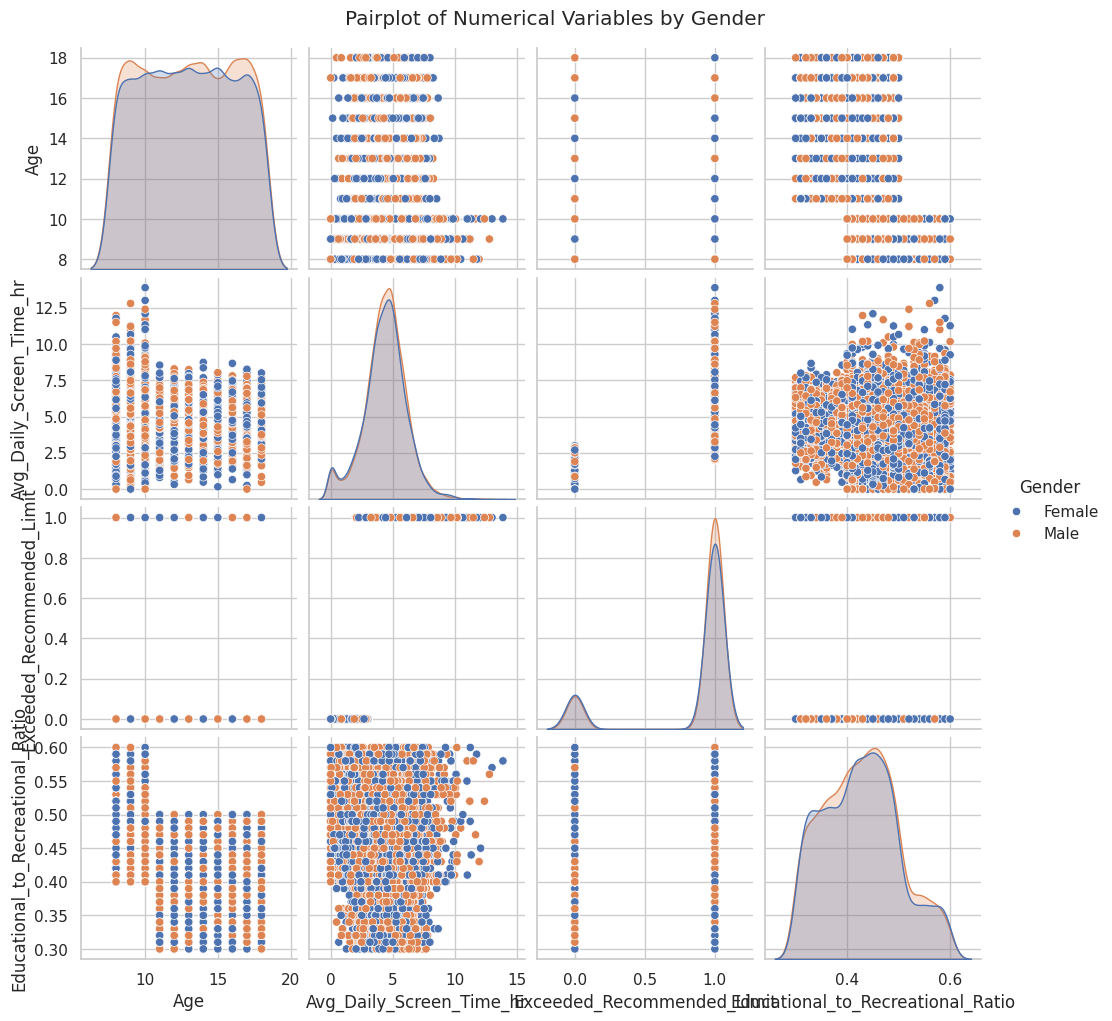

In [85]:
sns.pairplot(df, hue='Gender', palette='deep')
plt.suptitle("Pairplot of Numerical Variables by Gender", y=1.02)
plt.show()


1. Age distribution

Age is fairly evenly distributed across the range (approximately 6–18 years).

Males and females have similar age distributions (overlapping KDE lines).

2. Avg_Daily_Screen_Time_hr distribution

Most participants cluster between 4 to 8 hours per day.

Males and females have very similar patterns of screen time distribution — no strong gender difference.

There are a few outliers with screen time reaching up to ~12 hours.

3. Exceeded_Recommended_Limit

This variable is binary (0 or 1).

A large number of participants exceeded the recommended limit (most points are at 1).

No clear gender difference in exceeding screen time limits.

4. Educational_to_Recreational_Ratio

Most ratios fall between 0.3 and 0.6, indicating more recreational than educational screen use on average.

Distribution is very similar for both genders, with a peak around 0.45–0.5.

5. Pairwise Relationships

Age vs Avg_Daily_Screen_Time_hr:
→ No strong visible trend; screen time seems fairly spread across ages.
→ Matches the weak correlation seen in the heatmap.

Age vs Educational_to_Recreational_Ratio:
→ Some decrease in ratio with increasing age, which aligns with the negative correlation observed earlier.

Screen Time vs Ratio:
→ Slight trend: higher screen time tends to have a lower educational ratio, though not strongly.

Exceeded Limit vs Screen Time:
 → Clear split: those who exceeded the limit have much higher daily screen time, as expected.

## Heatmap (correlation between screen time, age, etc.).

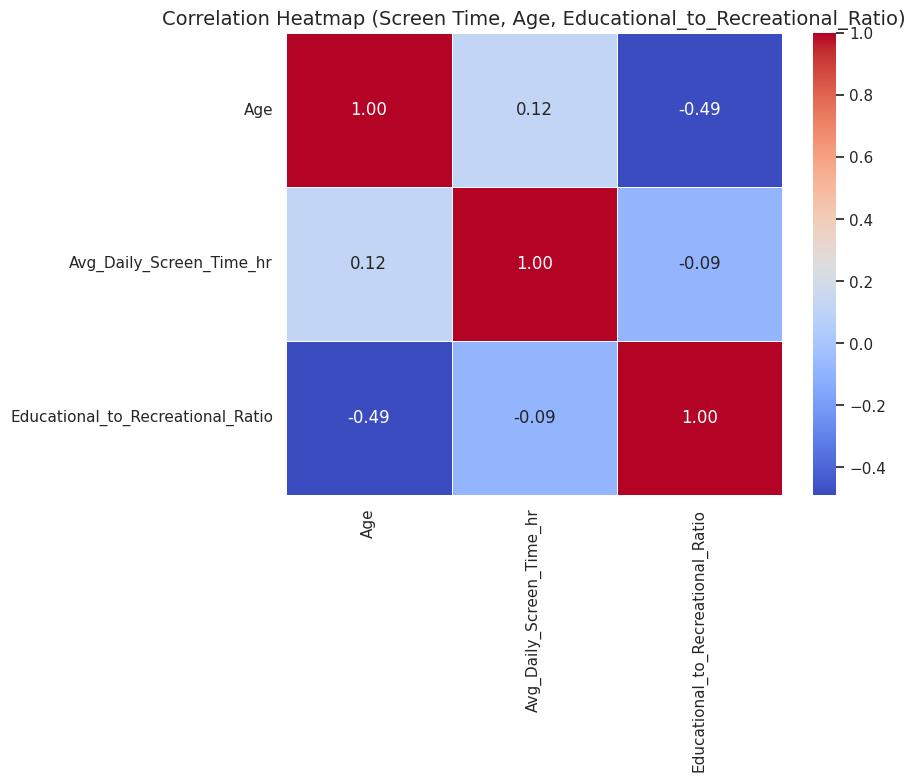

In [86]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Screen Time, Age, Educational_to_Recreational_Ratio)", fontsize=14)
plt.show()


This heatmap shows the correlation between three variables:
1.Age
2.Avg_Daily_Screen_Time_hr
3.Educational_to_Recreational_Ratio
Here are the key observations from the correlation values:

Age vs Avg_Daily_Screen_Time_hr:
Correlation = 0.12 (weak positive)
Interpretation: As age increases, daily screen time increases slightly — but the relationship is weak.

Age vs Educational_to_Recreational_Ratio:
Correlation = -0.49 (moderate negative)
Interpretation: As age increases, the ratio of educational to recreational screen time decreases.
→ Older individuals may spend proportionally more time on recreational activities compared to educational ones.

Avg_Daily_Screen_Time_hr vs Educational_to_Recreational_Ratio:
Correlation = -0.09 (very weak negative)
Interpretation: There is almost no meaningful relationship between total daily screen time and how that time is divided between educational and recreational activities.

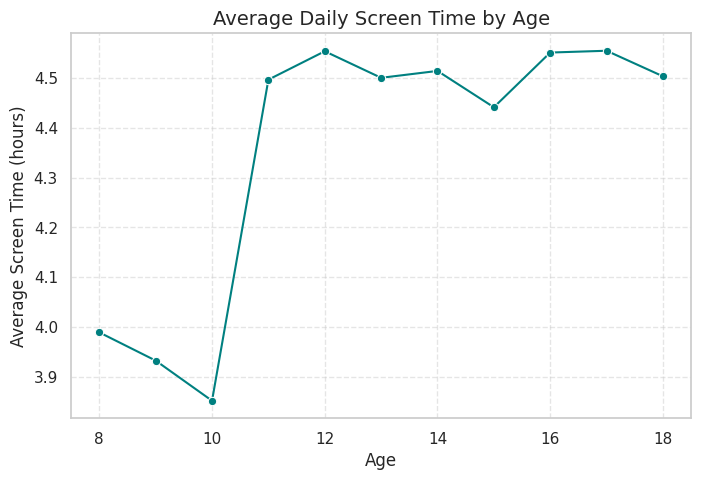

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average screen time by Age
avg_age = df.groupby('Age')['Avg_Daily_Screen_Time_hr'].mean().reset_index()

# Line plot
plt.figure(figsize=(8,5))
sns.lineplot(data=avg_age, x='Age', y='Avg_Daily_Screen_Time_hr', marker='o', color='teal')
plt.title("Average Daily Screen Time by Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Average Screen Time (hours)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()






## Compare device mix and activity categories across demographics

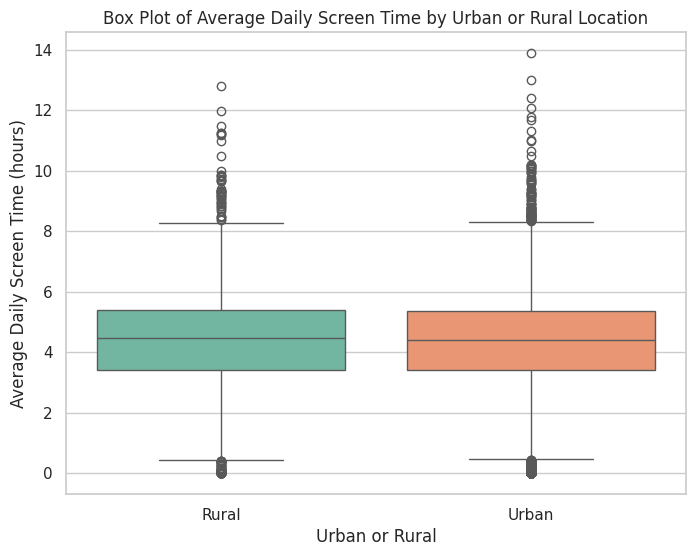

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', palette='Set2', legend=False)
plt.title('Box Plot of Average Daily Screen Time by Urban or Rural Location')
plt.xlabel('Urban or Rural')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()




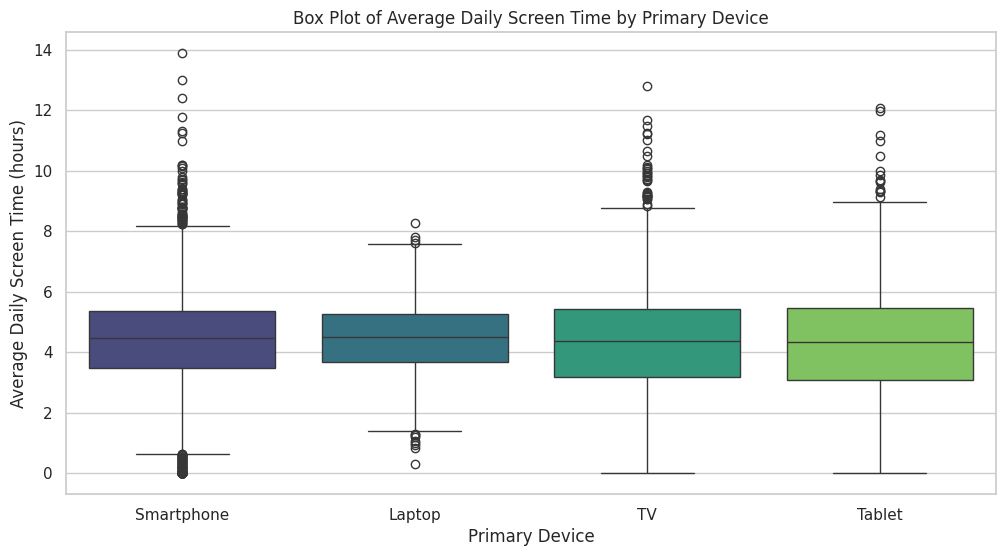

In [89]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Primary_Device', palette='viridis', legend=False)
plt.title('Box Plot of Average Daily Screen Time by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()

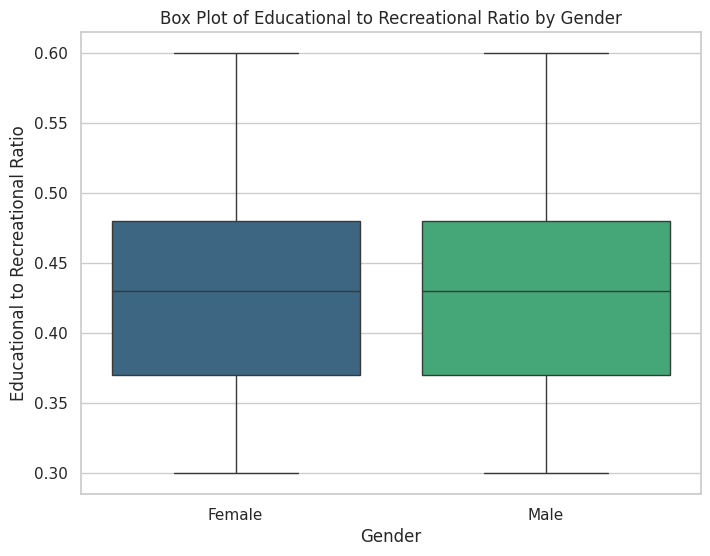

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Educational_to_Recreational_Ratio', hue='Gender', palette='viridis', legend=False)
plt.title('Box Plot of Educational to Recreational Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Educational to Recreational Ratio')
plt.show()

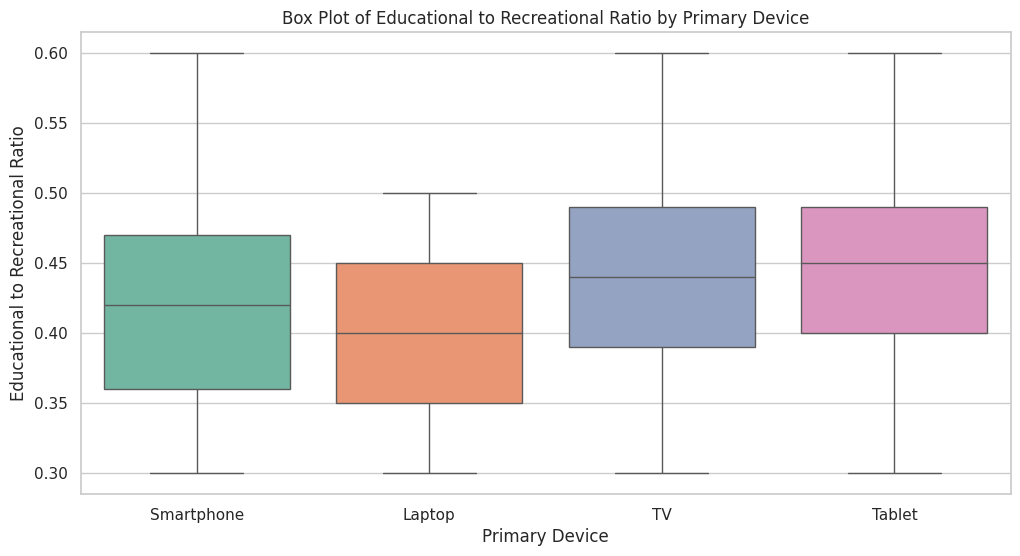

In [91]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Primary_Device', y='Educational_to_Recreational_Ratio', hue='Primary_Device', palette='Set2', legend=False)
plt.title('Box Plot of Educational to Recreational Ratio by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Educational to Recreational Ratio')
plt.show()

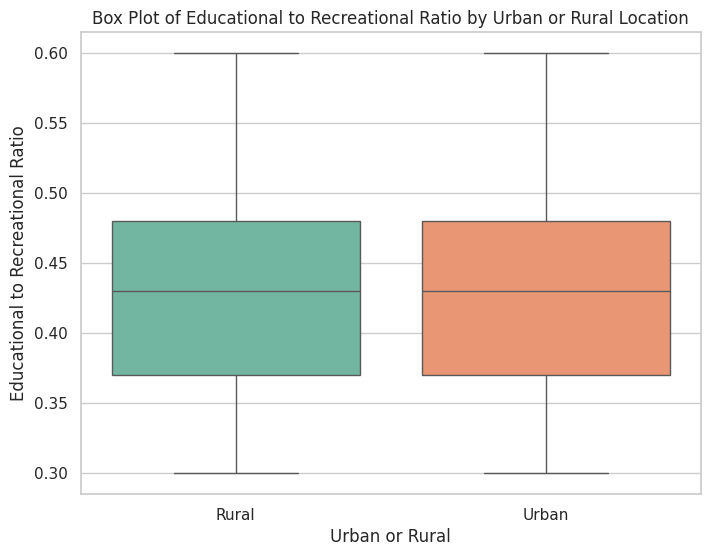

In [92]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Urban_or_Rural', y='Educational_to_Recreational_Ratio', hue='Urban_or_Rural', palette='Set2', legend=False)
plt.title('Box Plot of Educational to Recreational Ratio by Urban or Rural Location')
plt.xlabel('Urban or Rural')
plt.ylabel('Educational to Recreational Ratio')
plt.show()

In [93]:

device_gender_counts = df.groupby('Primary_Device')['Gender'].value_counts().unstack(fill_value=0)
display(device_gender_counts)

Gender,Female,Male
Primary_Device,,
Laptop,741,692
Smartphone,2221,2347
TV,1218,1269
Tablet,590,634


## Health Impacts by column

In [94]:
health_impact_counts = df['Health_Impacts'].value_counts()
print("Unique values and their counts in 'Health_Impacts' column:")
display(health_impact_counts)

Unique values and their counts in 'Health_Impacts' column:


,count
Health_Impacts,
Poor Sleep,2268
"Poor Sleep, Eye Strain",979
Eye Strain,644
"Poor Sleep, Anxiety",608
"Poor Sleep, Obesity Risk",452
Anxiety,385
"Poor Sleep, Eye Strain, Anxiety",258
Obesity Risk,252
"Poor Sleep, Eye Strain, Obesity Risk",188


## Investigate relationships with categorical variables

In [95]:
gender_health_crosstab = pd.crosstab(df['Health_Impacts'], df['Gender'])
device_health_crosstab = pd.crosstab(df['Health_Impacts'], df['Primary_Device'])
location_health_crosstab = pd.crosstab(df['Health_Impacts'], df['Urban_or_Rural'])

print("Cross-tabulation of Health_Impacts and Gender:")
display(gender_health_crosstab)

print("\nCross-tabulation of Health_Impacts and Primary_Device:")
display(device_health_crosstab)

print("\nCross-tabulation of Health_Impacts and Urban_or_Rural:")
display(location_health_crosstab)

Cross-tabulation of Health_Impacts and Gender:


Gender,Female,Male
Health_Impacts,,
Anxiety,186,199
"Anxiety, Obesity Risk",35,34
Eye Strain,324,320
"Eye Strain, Anxiety",68,67
"Eye Strain, Anxiety, Obesity Risk",16,19
"Eye Strain, Obesity Risk",53,53
Obesity Risk,103,149
Poor Sleep,1117,1151
"Poor Sleep, Anxiety",294,314



Cross-tabulation of Health_Impacts and Primary_Device:


Primary_Device,Laptop,Smartphone,TV,Tablet
Health_Impacts,,,,
Anxiety,62,180,103,40
"Anxiety, Obesity Risk",11,34,16,8
Eye Strain,101,307,170,66
"Eye Strain, Anxiety",28,63,25,19
"Eye Strain, Anxiety, Obesity Risk",7,19,9,0
"Eye Strain, Obesity Risk",16,57,23,10
Obesity Risk,37,132,57,26
Poor Sleep,370,1051,576,271
"Poor Sleep, Anxiety",108,272,151,77



Cross-tabulation of Health_Impacts and Urban_or_Rural:


Urban_or_Rural,Rural,Urban
Health_Impacts,,
Anxiety,117,268
"Anxiety, Obesity Risk",20,49
Eye Strain,189,455
"Eye Strain, Anxiety",30,105
"Eye Strain, Anxiety, Obesity Risk",14,21
"Eye Strain, Obesity Risk",25,81
Obesity Risk,75,177
Poor Sleep,655,1613
"Poor Sleep, Anxiety",192,416


## Investigate relationships with numerical variables

/tmp/ipython-input-3543003254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Health_Impacts', y='Age', ax=axes[0], palette='Set2')
/tmp/ipython-input-3543003254.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Health_Impacts', y='Avg_Daily_Screen_Time_hr', ax=axes[1], palette='Set2')
/tmp/ipython-input-3543003254.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Health_Impacts', y='Educational_to_Recreational_Ratio', ax=axes[2], palette='Set2')


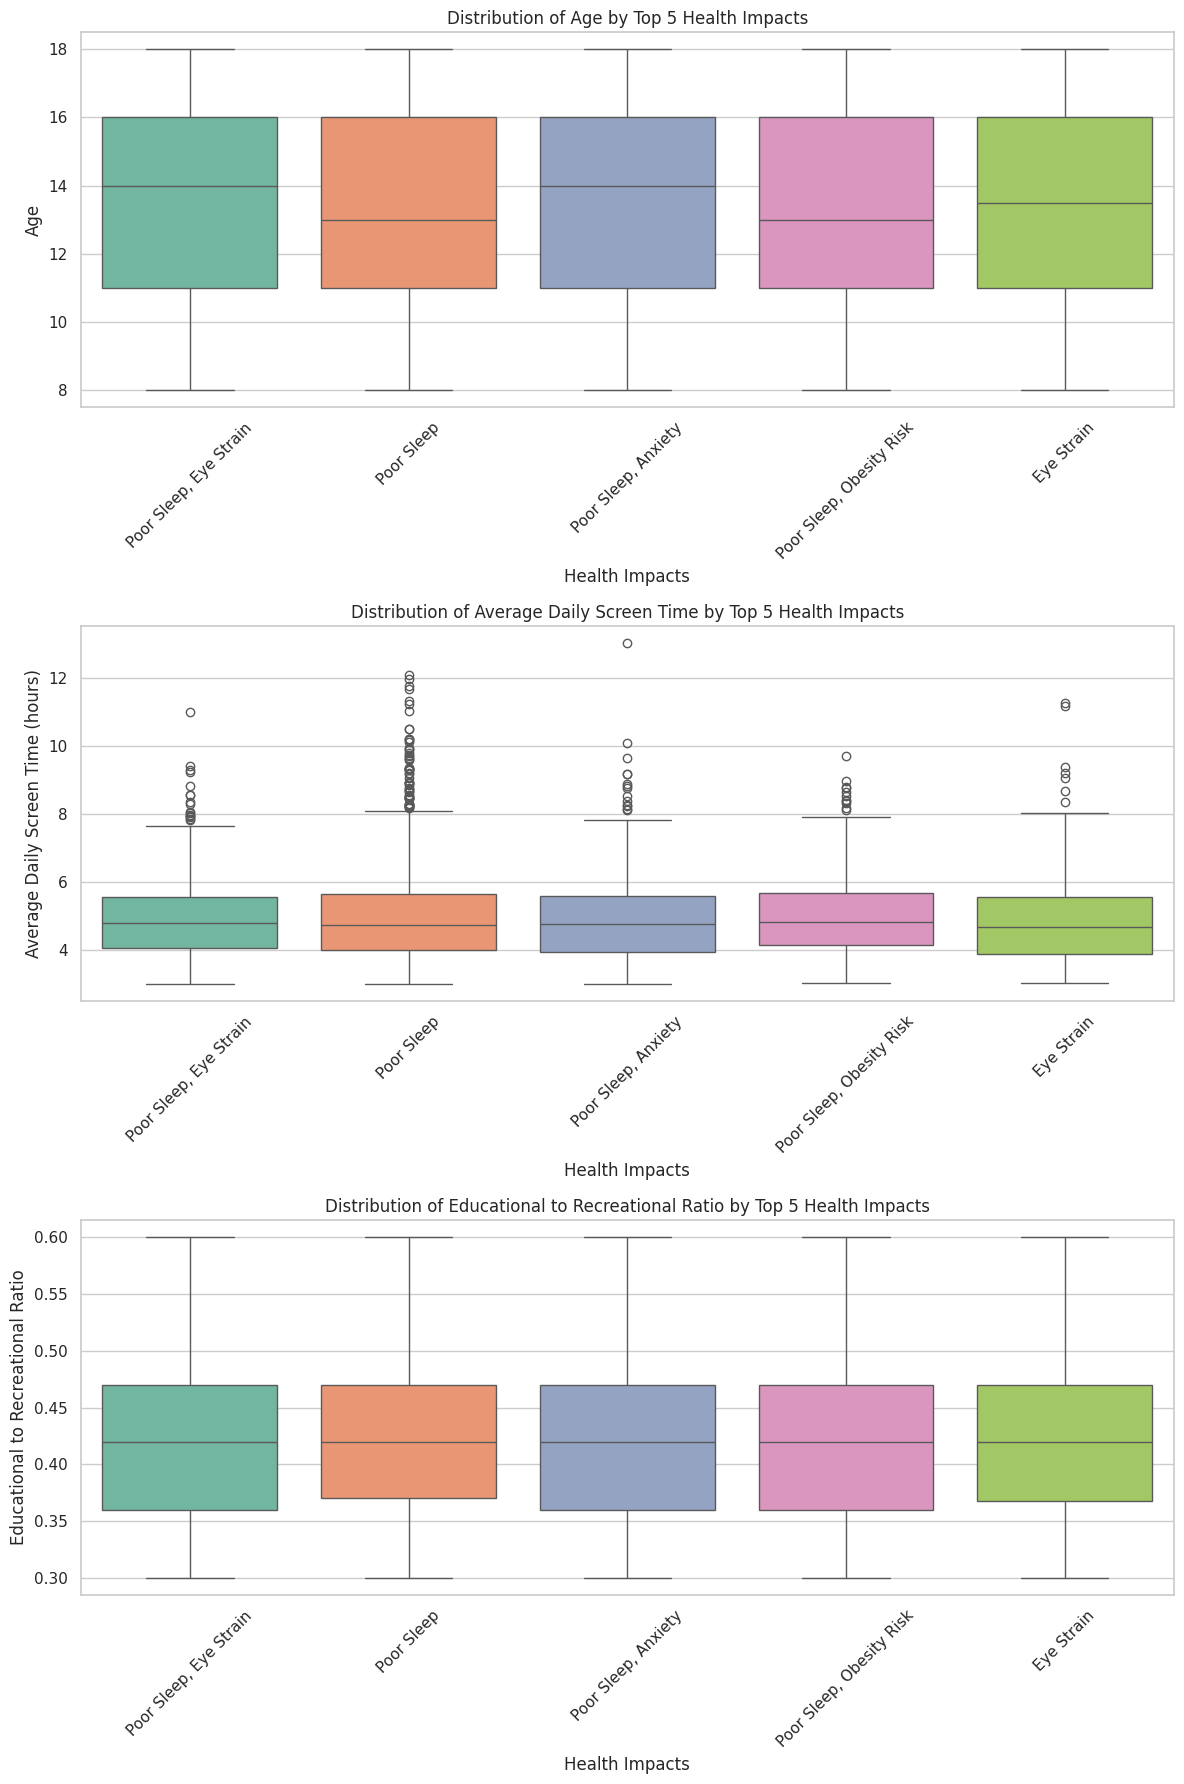

In [96]:
top_health_impacts = df['Health_Impacts'].value_counts().nlargest(5).index.tolist()
df_filtered = df[df['Health_Impacts'].isin(top_health_impacts)]

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.boxplot(data=df_filtered, x='Health_Impacts', y='Age', ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Age by Top 5 Health Impacts')
axes[0].set_xlabel('Health Impacts')
axes[0].set_ylabel('Age')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_filtered, x='Health_Impacts', y='Avg_Daily_Screen_Time_hr', ax=axes[1], palette='Set2')
axes[1].set_title('Distribution of Average Daily Screen Time by Top 5 Health Impacts')
axes[1].set_xlabel('Health Impacts')
axes[1].set_ylabel('Average Daily Screen Time (hours)')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_filtered, x='Health_Impacts', y='Educational_to_Recreational_Ratio', ax=axes[2], palette='Set2')
axes[2].set_title('Distribution of Educational to Recreational Ratio by Top 5 Health Impacts')
axes[2].set_xlabel('Health Impacts')
axes[2].set_ylabel('Educational to Recreational Ratio')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [97]:


from scipy import stats

numerical_vars = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']

for var in numerical_vars:
    groups = [df_filtered[df_filtered['Health_Impacts'] == impact][var].dropna() for impact in top_health_impacts]
    if len(groups) > 1:
        f_statistic, p_value = stats.f_oneway(*groups)
        print(f"ANOVA test for {var} across Top 5 Health Impacts:")
        print(f"F-statistic: {f_statistic:.2f}, P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("Result: There is a statistically significant difference in the means.")
        else:
            print("Result: There is no statistically significant difference in the means.")
        print("-" * 30)
    else:
        print(f"Not enough groups to perform ANOVA for {var}.")

ANOVA test for Age across Top 5 Health Impacts:
F-statistic: 3.40, P-value: 0.0087
Result: There is a statistically significant difference in the means.
------------------------------
ANOVA test for Avg_Daily_Screen_Time_hr across Top 5 Health Impacts:
F-statistic: 2.59, P-value: 0.0351
Result: There is a statistically significant difference in the means.
------------------------------
ANOVA test for Educational_to_Recreational_Ratio across Top 5 Health Impacts:
F-statistic: 0.29, P-value: 0.8860
Result: There is no statistically significant difference in the means.
------------------------------


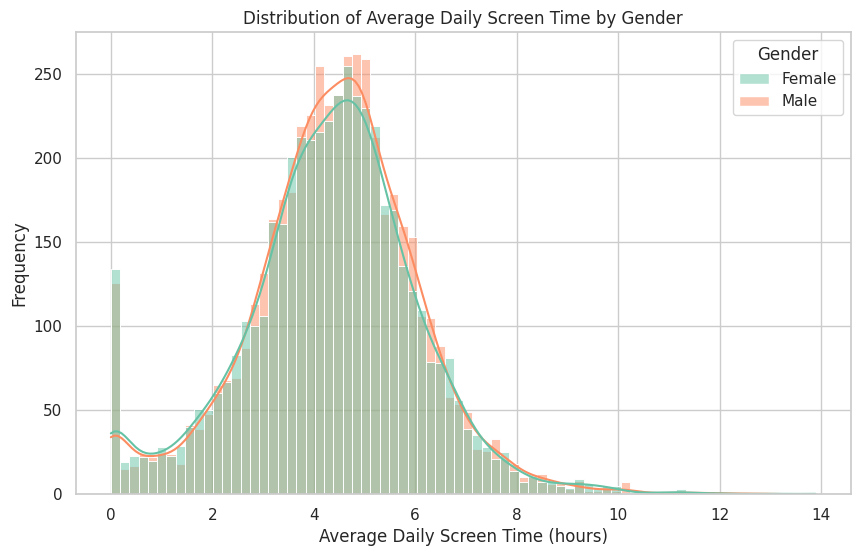

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Avg_Daily_Screen_Time_hr', hue='Gender', kde=True, palette='Set2')
plt.title('Distribution of Average Daily Screen Time by Gender')
plt.xlabel('Average Daily Screen Time (hours)')
plt.ylabel('Frequency')
plt.show()


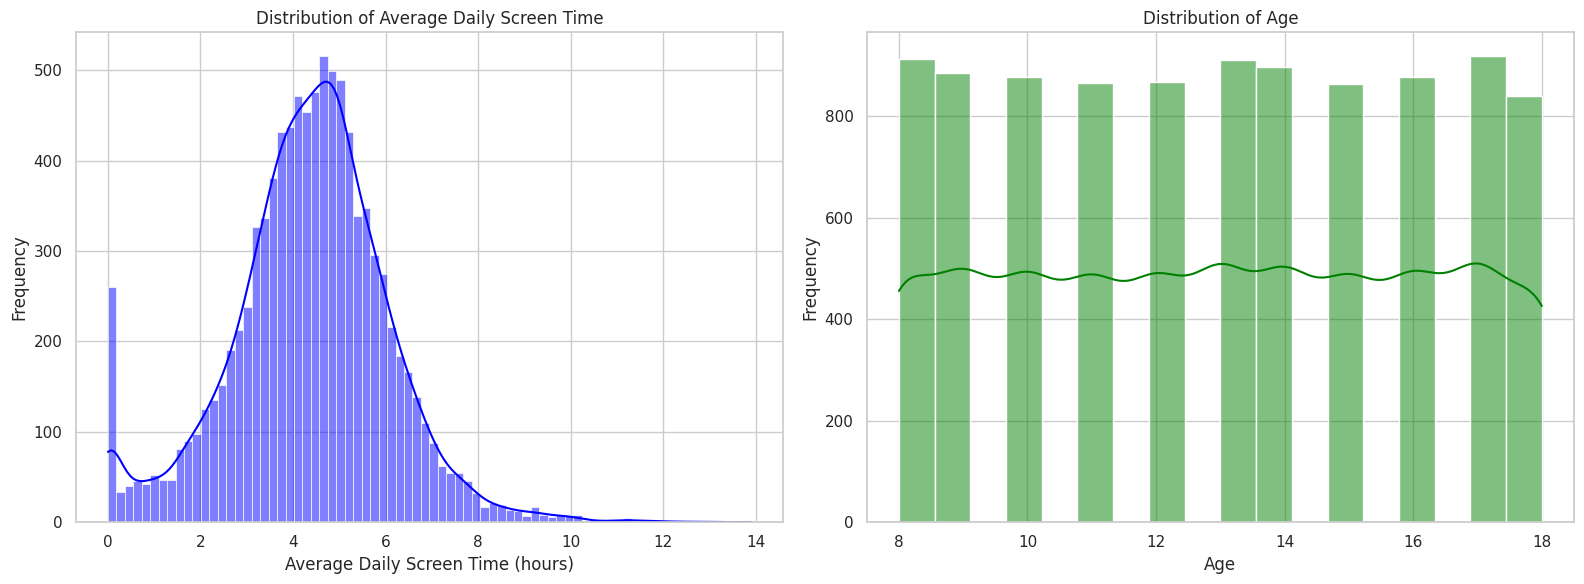

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=df, x='Avg_Daily_Screen_Time_hr', kde=True, color='Blue', ax=axes[0])
axes[0].set_title('Distribution of Average Daily Screen Time')
axes[0].set_xlabel('Average Daily Screen Time (hours)')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df, x='Age', kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

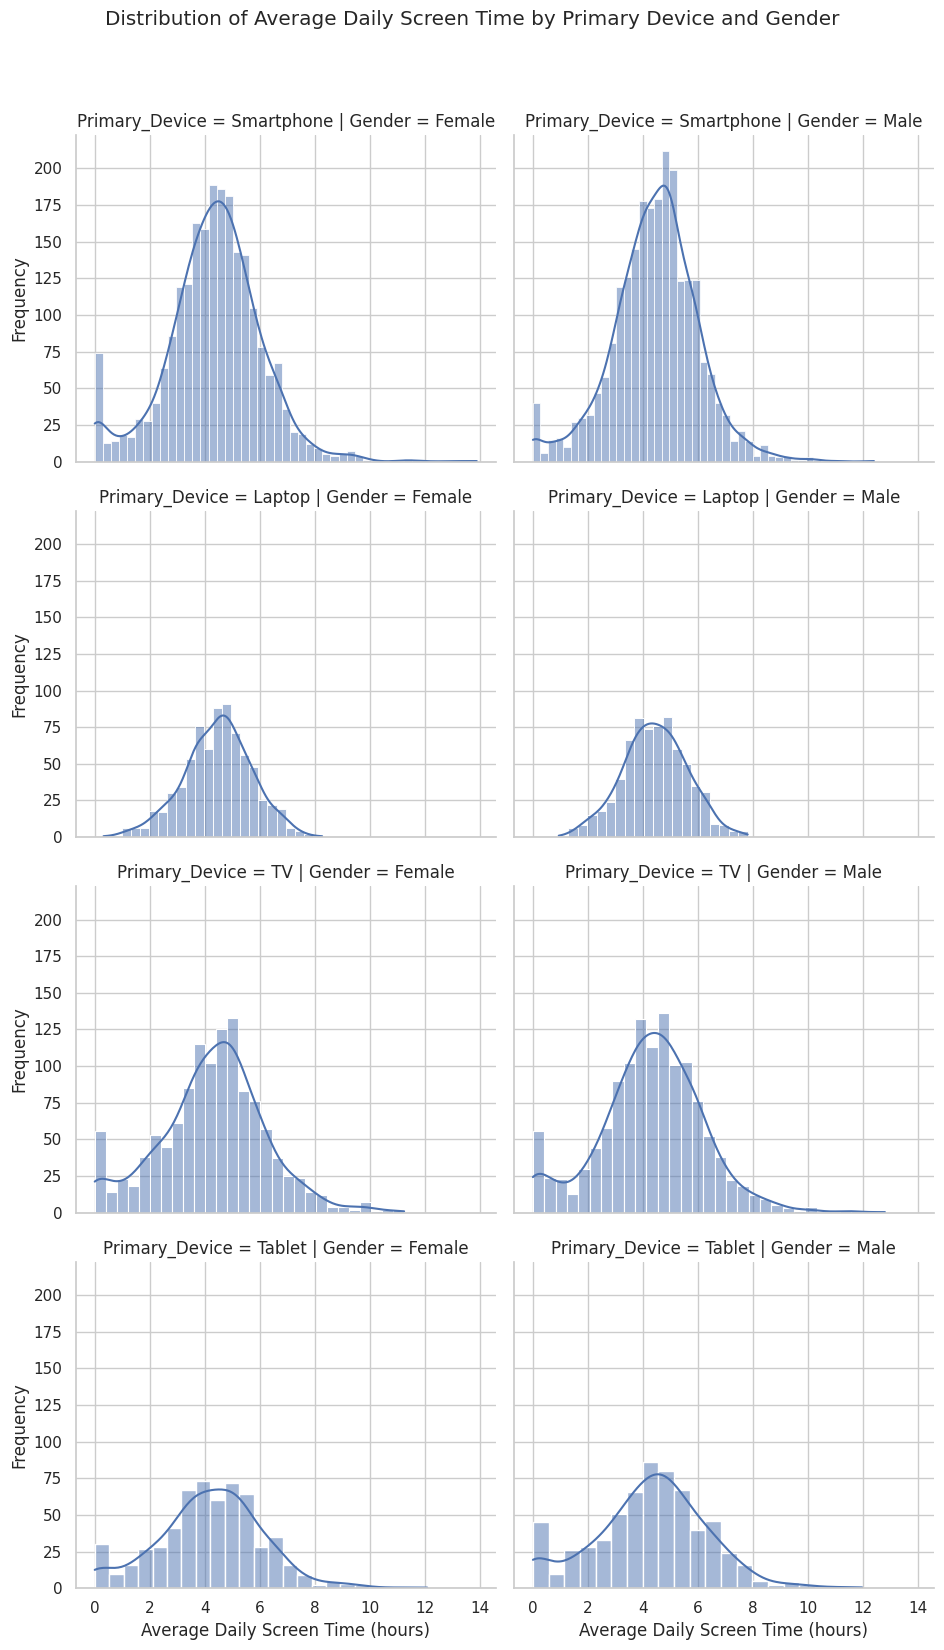

In [100]:

g = sns.FacetGrid(df, col='Gender', row='Primary_Device', height=4, aspect=1.2)
g.map(sns.histplot, 'Avg_Daily_Screen_Time_hr', kde=True)
g.fig.suptitle('Distribution of Average Daily Screen Time by Primary Device and Gender', y=1.03)
g.set_axis_labels('Average Daily Screen Time (hours)', 'Frequency')
plt.tight_layout()
plt.show()

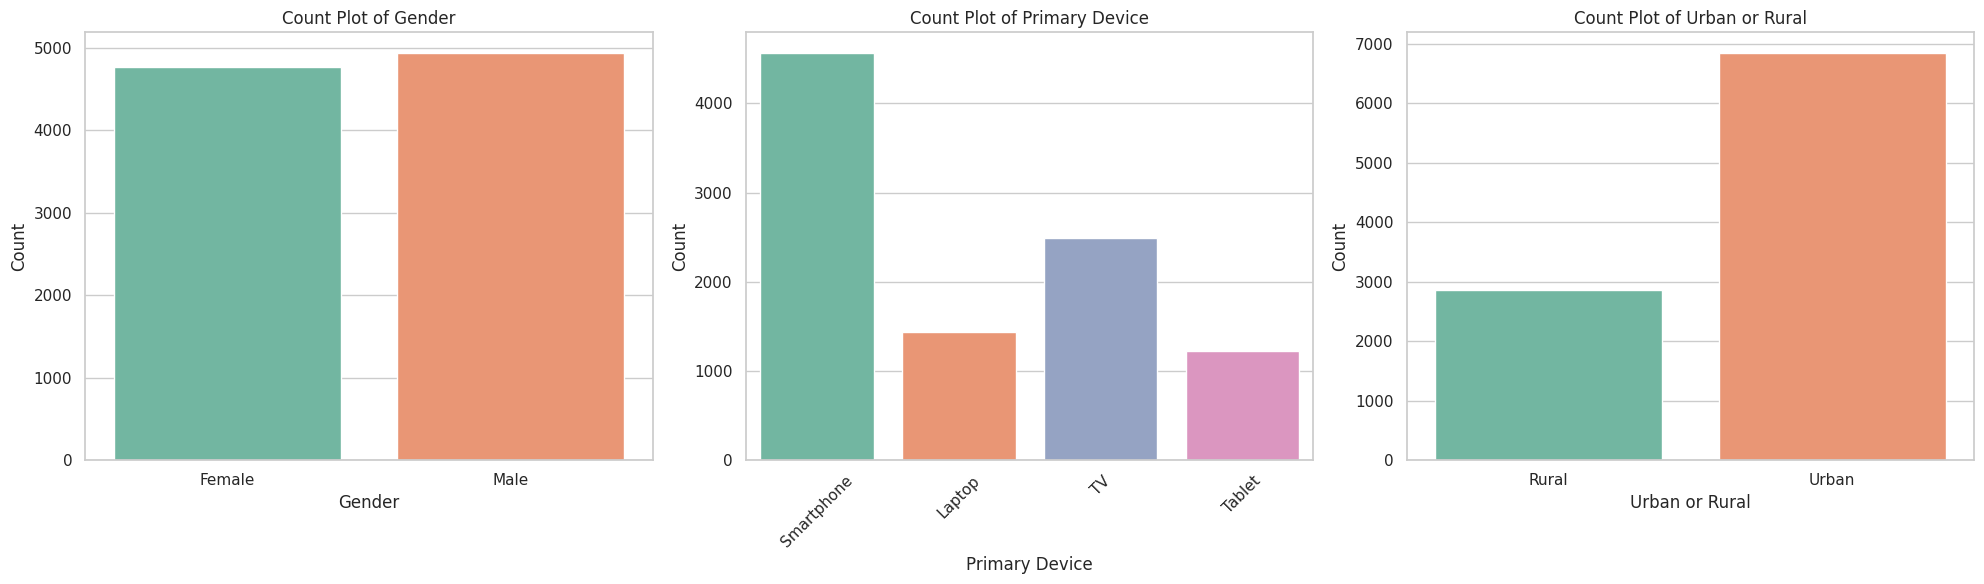

In [101]:

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(data=df, x='Gender', hue='Gender', palette='Set2', legend=False, ax=axes[0])
axes[0].set_title('Count Plot of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Primary_Device', hue='Primary_Device', palette='Set2', legend=False, ax=axes[1])
axes[1].set_title('Count Plot of Primary Device')
axes[1].set_xlabel('Primary Device')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='Urban_or_Rural', hue='Urban_or_Rural', palette='Set2', legend=False, ax=axes[2])
axes[2].set_title('Count Plot of Urban or Rural')
axes[2].set_xlabel('Urban or Rural')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

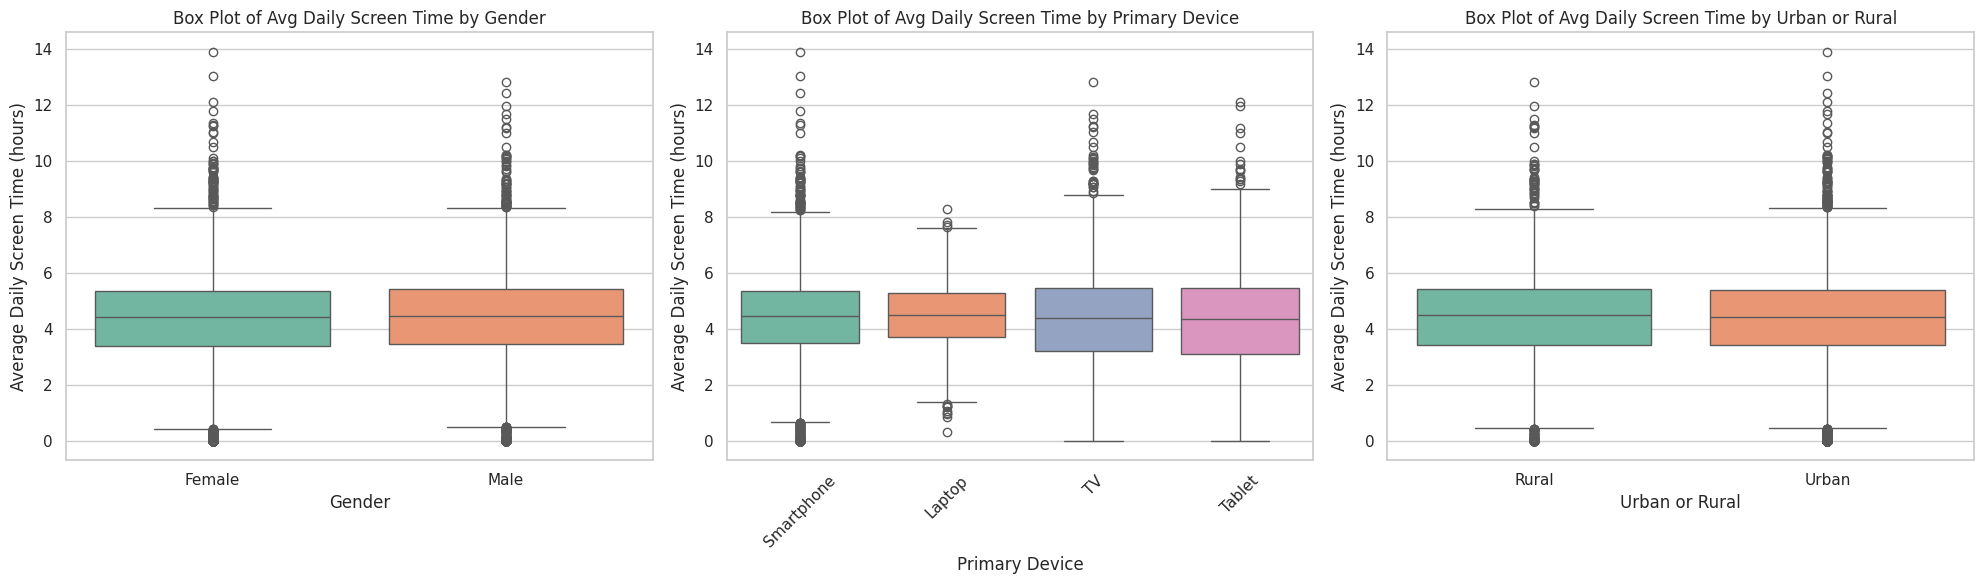

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', hue='Gender', palette='Set2', legend=False, ax=axes[0])
axes[0].set_title('Box Plot of Avg Daily Screen Time by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Daily Screen Time (hours)')

sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Primary_Device', palette='Set2', legend=False, ax=axes[1])
axes[1].set_title('Box Plot of Avg Daily Screen Time by Primary Device')
axes[1].set_xlabel('Primary Device')
axes[1].set_ylabel('Average Daily Screen Time (hours)')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', palette='Set2', legend=False, ax=axes[2])
axes[2].set_title('Box Plot of Avg Daily Screen Time by Urban or Rural')
axes[2].set_xlabel('Urban or Rural')
axes[2].set_ylabel('Average Daily Screen Time (hours)')

plt.tight_layout()
plt.show()
